In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow

In [2]:
# Load the dataset 
Ids = pd.read_csv(r'C:\Users\Admin\Desktop\Study !\CIC-IDE.csv')
Ids.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# prints column names
print(Ids.columns.tolist())

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [4]:
# Removes extra spaces in column names
Ids.columns = Ids.columns.str.strip()

In [5]:
Ids.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [6]:
Ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225745 non-null  int64  
 1   Flow Duration                225745 non-null  int64  
 2   Total Fwd Packets            225745 non-null  int64  
 3   Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets  225745 non-null  int64  
 5   Total Length of Bwd Packets  225745 non-null  int64  
 6   Fwd Packet Length Max        225745 non-null  int64  
 7   Fwd Packet Length Min        225745 non-null  int64  
 8   Fwd Packet Length Mean       225745 non-null  float64
 9   Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max        225745 non-null  int64  
 11  Bwd Packet Length Min        225745 non-null  int64  
 12  Bwd Packet Length Mean       225745 non-null  float64
 13 

In [7]:
Ids.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [8]:
Ids['Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [9]:
Label_mapping = {'BENIGN' : 0 , 'DDoS' : 1}
Ids['Label'] = Ids['Label'].map(Label_mapping)

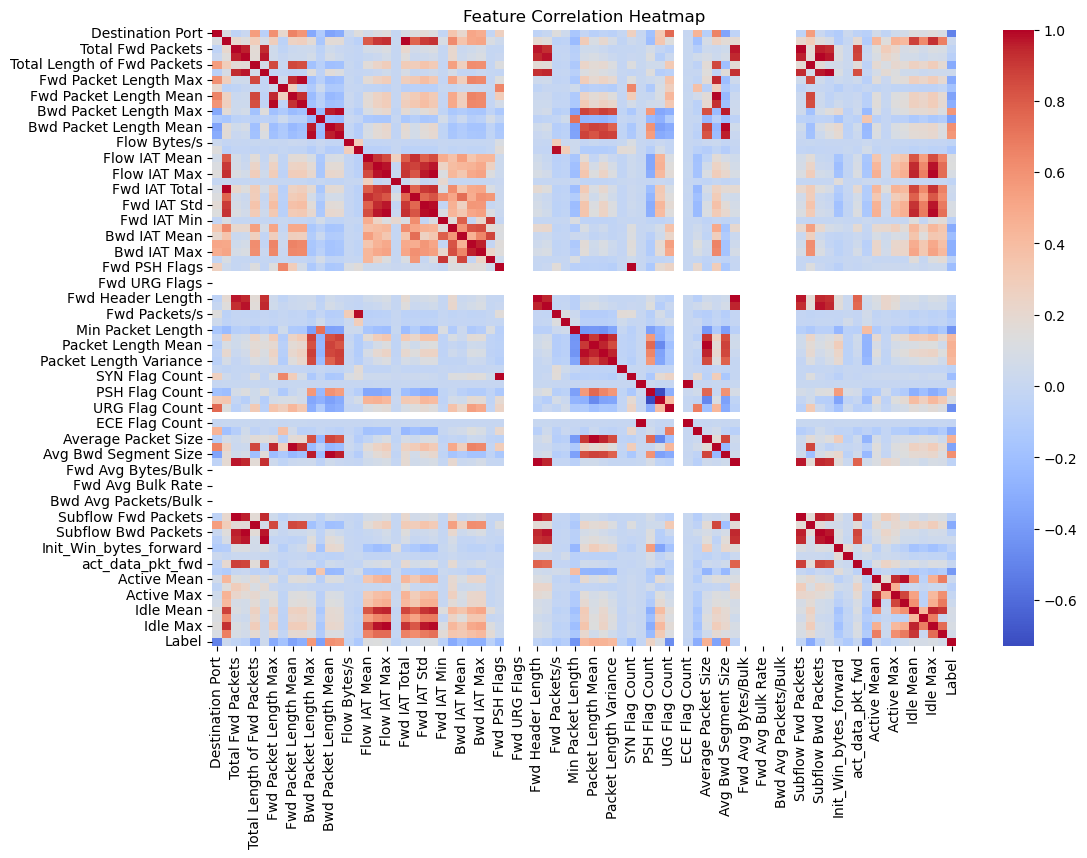

In [10]:
plt.figure(figsize=(12, 8))
corr_matrix = Ids.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
corr_matrix = Ids.corr()
print(corr_matrix)

                             Destination Port  Flow Duration  \
Destination Port                     1.000000       0.107038   
Flow Duration                        0.107038       1.000000   
Total Fwd Packets                   -0.044270       0.207660   
Total Backward Packets               0.008321       0.145272   
Total Length of Fwd Packets          0.553843       0.297832   
...                                       ...            ...   
Idle Mean                            0.132272       0.871855   
Idle Std                             0.110687       0.630604   
Idle Max                             0.144428       0.919199   
Idle Min                             0.095687       0.672003   
Label                               -0.509798       0.025923   

                             Total Fwd Packets  Total Backward Packets  \
Destination Port                     -0.044270                0.008321   
Flow Duration                         0.207660                0.145272   
Total Fwd

In [12]:
label = 'Label'  # Replace with your actual label column
correlation_target = corr_matrix[label].abs().sort_values(ascending=False)
print("\nFeatures most correlated with the label:")
print(correlation_target.head(15))


Features most correlated with the label:
Label                     1.000000
Bwd Packet Length Mean    0.603299
Avg Bwd Segment Size      0.603299
Bwd Packet Length Max     0.577323
Bwd Packet Length Std     0.576155
Destination Port          0.509798
URG Flag Count            0.463190
Packet Length Mean        0.454283
Average Packet Size       0.453472
Packet Length Std         0.443749
Min Packet Length         0.427396
Max Packet Length         0.414399
Packet Length Variance    0.408089
min_seg_size_forward      0.407315
Bwd Packet Length Min     0.365667
Name: Label, dtype: float64


In [13]:
class_counts = Ids[label].value_counts()
print("\nClass Distribution:")
print(class_counts)


Class Distribution:
Label
1    128027
0     97718
Name: count, dtype: int64


In [14]:
# Clean column names
Ids.columns = Ids.columns.str.strip()

# Redefine features
selected_features = [
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Flow Bytes/s',
    'Flow IAT Mean',
    'Packet Length Mean',
    'Packet Length Std',
    'Fwd Packet Length Mean',
    'Init Win Bytes Forward',  
    'PSH Flag Count',
    'ACK Flag Count',
    'Label'
]

# Check for missing features again
missing_features = [col for col in selected_features if col not in Ids.columns]
if missing_features:
    print(f"Missing features in dataset: {missing_features}")
    # Optionally remove them to proceed
    selected_features = [col for col in selected_features if col in Ids.columns]

# Define X and y
X = Ids[selected_features].drop('Label', axis=1)
y = Ids['Label']

print("Selected Features Shape:", X.shape)
print("Target Shape:", y.shape)

Missing features in dataset: ['Init Win Bytes Forward']
Selected Features Shape: (225745, 10)
Target Shape: (225745,)


In [15]:
print(Ids.columns.tolist())

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [16]:
[col for col in Ids.columns if 'init' in col.lower()]

['Init_Win_bytes_forward', 'Init_Win_bytes_backward']

In [17]:
# Check for infinite values
print("Has Inf:", np.isinf(x_train).any().any())
print("Has -Inf:", np.isneginf(x_train).any().any())
print("Has NaN:", np.isnan(x_train).any().any())
print("Max Value:", np.max(x_train.values))

NameError: name 'x_train' is not defined

In [20]:
# Define feature set
x = Ids[['Flow Duration',
         'Total Fwd Packets',
         'Total Backward Packets',
         'Flow Bytes/s',
         'Flow IAT Mean',
         'Packet Length Mean',
         'Packet Length Std',
         'Fwd Packet Length Mean',
         'Init_Win_bytes_forward',
         'PSH Flag Count',
         'ACK Flag Count']]

# Define target
y = Ids['Label']

# Check the shapes
print("Selected Features Shape:", x.shape)
print("Target Shape:", y.shape)

Selected Features Shape: (225745, 11)
Target Shape: (225745,)


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [24]:
# Check for infinite values
print("Has Inf:", np.isinf(x_train).any().any())
print("Has -Inf:", np.isneginf(x_train).any().any())
print("Has NaN:", np.isnan(x_train).any().any())
print("Max Value:", np.max(x_train.values))

Has Inf: True
Has -Inf: False
Has NaN: True
Max Value: nan


In [26]:
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
x_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now fill NaNs (option 1: with mean of the column)
x_train.fillna(x_train.mean(), inplace=True)
x_test.fillna(x_test.mean(), inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

In [ ]:
#model = RandomForestClassifier(n_estimators=40)
#model.fit(x_train,y_train)

In [ ]:
#y_pred = model.predict(x_test)

In [ ]:
#from sklearn.metrics import accuracy_score ,confusion_matrix

In [ ]:
#print(accuracy_score(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))

In [32]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense

In [34]:
Ids_model = Sequential()

Ids_model.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
Ids_model.add(Dense(units=32, activation='relu'))
Ids_model.add(Dense(units=16 , activation = 'relu')),
Ids_model.add(Dense(units=1, activation='sigmoid'))

C:\Users\Admin\Documents\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
Ids_model.compile(optimizer='adam' , loss ='binary_crossentropy' , metrics=['accuracy'])

In [38]:
history = Ids_model.fit(x_train,y_train,epochs= 20,batch_size = 34,validation_data=(x_train,y_train))

Epoch 1/20
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.9743 - loss: 0.0770 - val_accuracy: 0.9989 - val_loss: 0.0092
Epoch 2/20
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9982 - loss: 0.0100 - val_accuracy: 0.9986 - val_loss: 0.0064
Epoch 3/20
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9986 - loss: 0.0070 - val_accuracy: 0.9990 - val_loss: 0.0051
Epoch 4/20
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9986 - loss: 0.0064 - val_accuracy: 0.9989 - val_loss: 0.0052
Epoch 5/20
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9986 - loss: 0.0067 - val_accuracy: 0.9988 - val_loss: 0.0057
Epoch 6/20
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9990 - loss: 0.0050 - val_accuracy: 0.9987 - val_loss: 0.0057
Epoch 7/20
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.9990 - loss: 0.0050 - val_accuracy: 0.9990 - val_loss: 0.0048
Epoch 8/20
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.9988 - loss: 0

In [40]:
loss , accuracy = Ids_model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

1411/1411 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9991 - loss: 0.0033
0.004035888239741325
0.9989590048789978


In [50]:
import os
import pickle


desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Ids_model.pkl")

with open('Ids_model.pkl', 'wb') as file:
    pickle.dump(Ids_model, file)